In [2]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting and visualizations
import random  # For generating random numbers

# Load the dataset
# The dataset 'Ads_CTR_Optimisation.csv' should be in the same directory as this script
ds = pd.read_csv('Ads_CTR_Optimisation.csv')

# Display the first 5 rows of the dataset to get an overview of the data
ds.head()


,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting and visualizations
import random  # For generating random numbers

# Load the dataset
# The dataset 'Ads_CTR_Optimisation.csv' should be in the same directory as this script
ds = pd.read_csv('Ads_CTR_Optimisation.csv')

# Define variables
d = 10  # Total number of ads
number_of_rewards_1 = [0] * d  # Number of times each ad received a reward of 1
number_of_rewards_0 = [0] * d  # Number of times each ad received a reward of 0
N = 10000  # Total number of rounds (iterations)
ads_selected = []  # List to keep track of all selected ads
total_reward = 0  # Total reward accumulated over all rounds
numbers_of_selection = [0] * d  # Number of times each ad was selected

# Implement the Thompson Sampling algorithm
for n in range(0, N):
    max_random = 0  # Initialize the maximum random draw to 0 for each round
    ad = 0  # Initialize the ad index for selection
    
    for i in range(0, d):
        # Draw a random number from the beta distribution for ad i
        random_beta = random.betavariate(number_of_rewards_1[i] + 1, number_of_rewards_0[i] + 1)
        
        # Select the ad with the highest random draw
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    
    # Append the selected ad to the list of selected ads
    ads_selected.append(ad)
    
    # Get the reward for the selected ad from the dataset
    reward = ds.values[n, ad]
    
    # Update the total reward
    total_reward += reward
    
    # Update the count of rewards for the selected ad
    if reward == 1:
        number_of_rewards_1[ad] += 1
    else:
        number_of_rewards_0[ad] += 1
    
    # Increment the selection count for the selected ad
    numbers_of_selection[ad] += 1
print(total_reward)


2598


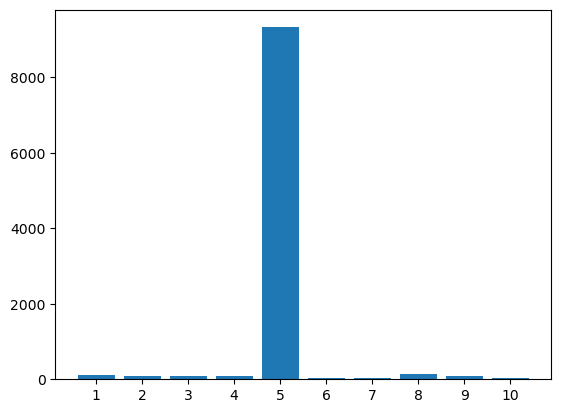

In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt  # For data visualization

# Create a bar chart
# range(1, 11) generates x-ticks from 1 to 10, representing each ad
# numbers_of_selection contains the number of times each ad was selected
plt.bar(range(1, 11), numbers_of_selection, align="center")

# Set the x-ticks to correspond to the ad numbers (1 through 10)
plt.xticks(range(1, 11))

# Display the bar chart
plt.show()


In [7]:
numbers_of_selection

[106, 82, 85, 93, 9327, 26, 39, 131, 79, 32]